# Rooftop Classfiication NN 
## Exploratory Data Analysis 

### About the Data
Color, 6 inch resolution aerial photography for the City and County of Denver acquired in 2004. True-ortho correction is applied to all structures 4 stories and above in designated areas including all bridges and highway overpasses.  

Coverage are includes a 359 square mile area encompassing the City and County of Denver, City of Glendale, City of Littleton, and the Denver Water Service Area. This project does not include DIA.

Accoridng to the image map, every image in this set is the same size. The image's filename shows the lat lon coordinates.  

ftp://anon.denvergov.org/gis2/aerial_photography/2004/index.pdf


This EDA was primarily based off the work of Ben Kamphaus from Kaggle. Thank you, Ben! 
https://www.kaggle.com/bkamphaus/exploratory-image-analysis

In [1]:
import numpy as np
import pandas as pd
import glob 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


Converted all JP2s to JPGs with XnConvert for Linux.

In [2]:
jpegs = [f for f in glob.glob("JP2/*.jpg")]
print(jpegs[:9])

['JP2/Denver_image_2015.jpg', 'JP2/Denver_image_1973.jpg', 'JP2/Denver_image_981.jpg', 'JP2/Denver_image_2220.jpg', 'JP2/Denver_image_897.jpg', 'JP2/Denver_image_1483.jpg', 'JP2/Denver_image_5.jpg', 'JP2/Denver_image_1010.jpg', 'JP2/Denver_image_1700.jpg']


Let's take a peak at the very first image in the dataset.

In [3]:
firstimg = plt.imread("JP2/Denver_image_1.jpg")


The image has 2,640 rows and columns and three channels (RGB).

In [4]:
dims = np.shape(firstimg)
print (dims)

(2640, 2640, 3)


We can print out the values in the image and get back what we expect. The max value in an RGB image is 255 (and a min of 0).

In [5]:
np.min(firstimg), np.max(firstimg)


(0, 255)

We need to create a matric of the pixels by color channels. The output is an array with each pixel's RGB values (for example, 122, 121, 127... we have a lot of grey in our image).

In [6]:
pixel_matrix = np.reshape(firstimg, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))


(6969600, 3)


In [7]:
pixel_matrix

array([[122, 121, 127],
       [121, 120, 126],
       [124, 123, 129],
       ...,
       [157, 155, 156],
       [157, 155, 156],
       [157, 155, 156]], dtype=uint8)

We can plot the channels against each other and look for any kinda of correlation. Below I plot the first chanel (0) against the third channel (2). The histogram shows that there are a lot of pixels have an equal value of R and B (grey).

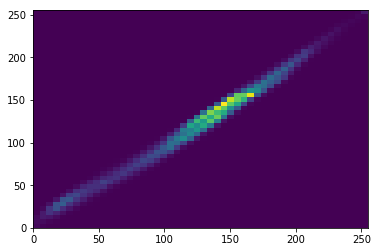

In [8]:
_ = plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))


Let's take a look at another image. The fifth on in this case.

In [9]:
fifth = plt.imread('JP2/Denver_image_5.jpg')
dims = np.shape(fifth)
pixel_matrix5 = np.reshape(fifth, (dims[0] * dims[1], dims[2]))


This histogram shows a lesser range of color in the image, but the image is still primarily grey.

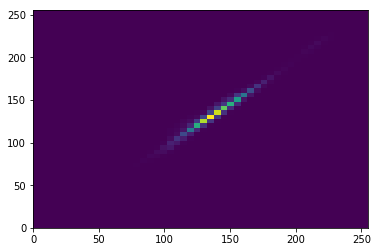

In [10]:
_ = plt.hist2d(pixel_matrix5[:,1], pixel_matrix5[:,2], bins=(50,50))


We can compare channels (in this case, the third channel) between the two images. The histogram below shows that the most common shared values lie in the middle... again, grey.

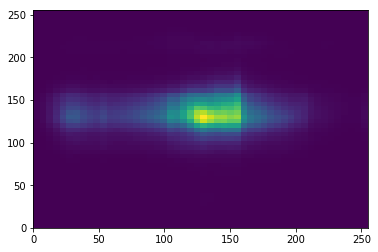

In [11]:
_ = plt.hist2d(pixel_matrix[:,2], pixel_matrix5[:,2], bins=(50,50))

So what do these images look like, anyway?

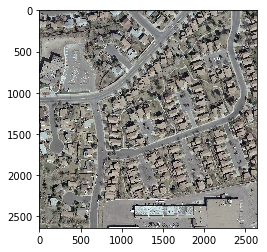

In [12]:
plt.imshow(firstimg)


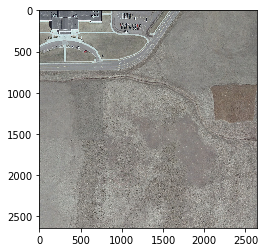

In [13]:
plt.imshow(fifth)


Let's look at the pixel distributions across three channels (

Yup, those certainly are some grey images.

## K-Mean Clustering
We can experiment with compressing an image by applying a quick k-means clustering on the image with a k of 5. This gives us an impression of what kinds of features we might be able to extract from the image set.  

From the result below, we see a dark purple for the roads, yellow for the green spaces, and blues and greens for the built environment.

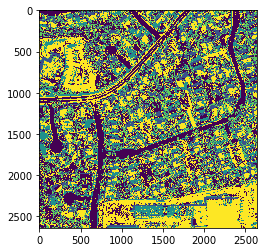

In [14]:
# simple k means clustering
from sklearn import cluster

kmeans = cluster.KMeans(5)
clustered = kmeans.fit_predict(pixel_matrix)

dims = np.shape(firstimg)
clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)

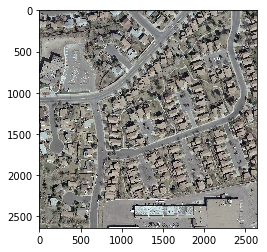

In [15]:
plt.imshow(firstimg)


We can plot the histogram of the color values for each channel in the image. All three channels seem to correlate strongly with each other, indicating a lot of grey values.

/home/thebbennett/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


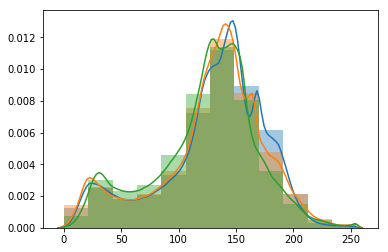

In [16]:
# quick look at color value histograms for pixel matrix from first image
import seaborn as sns
sns.distplot(pixel_matrix[:,0], bins=12)
sns.distplot(pixel_matrix[:,1], bins=12)
sns.distplot(pixel_matrix[:,2], bins=12)


## Lightweight wrapper for handling image matrix transformations

In [17]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = img
        self.dims = np.shape(img)
        self.mat = np.reshape(img, (self.dims[0] * self.dims[1], self.dims[2]))

    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))

In [18]:
msi_first = MSImage(firstimg)
print(np.shape(msi_first.matrix))
print(np.shape(msi_first.img))


(6969600, 3)
(2640, 2640, 3)


## More Image Analysis
Thanks to https://dzone.com/articles/basic-image-data-analysis-using-python-part-2
Let's review our first image:

In [19]:
print('Type of the image : ' , type(firstimg))
print('Shape of the image : {}'.format(firstimg.shape))
print('Image Hight {}'.format(firstimg.shape[0]))
print('Image Width {}'.format(firstimg.shape[1]))
print('Dimension of Image {}'.format(firstimg.ndim))


Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (2640, 2640, 3)
Image Hight 2640
Image Width 2640
Dimension of Image 3


We can also select a random pixel in the image and took a look. And unsurprisingly we get a type of grey.

In [20]:
firstimg[ 100, 50 ]


array([61, 66, 70], dtype=uint8)

Let's plot the red channel of the image.

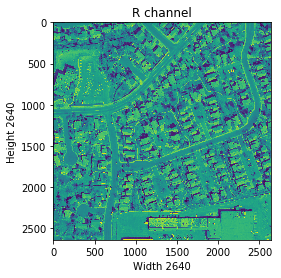

In [21]:
plt.title('R channel')
plt.ylabel('Height {}'.format(firstimg.shape[0]))
plt.xlabel('Width {}'.format(firstimg.shape[1]))
plt.imshow(firstimg[ : , : , 0])
plt.show()


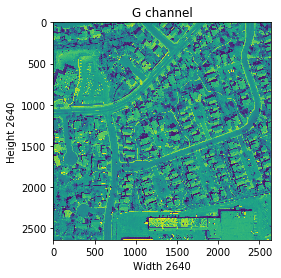

In [22]:
plt.title('G channel')
plt.ylabel('Height {}'.format(firstimg.shape[0]))
plt.xlabel('Width {}'.format(firstimg.shape[1]))
plt.imshow(firstimg[ : , : , 1])
plt.show()

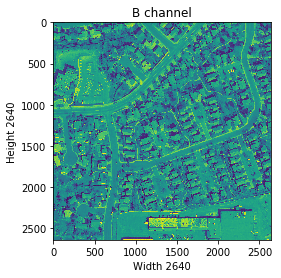

In [23]:
plt.title('B channel')
plt.ylabel('Height {}'.format(firstimg.shape[0]))
plt.xlabel('Width {}'.format(firstimg.shape[1]))
plt.imshow(firstimg[ : , : , 2])
plt.show()


### Splitting the layers

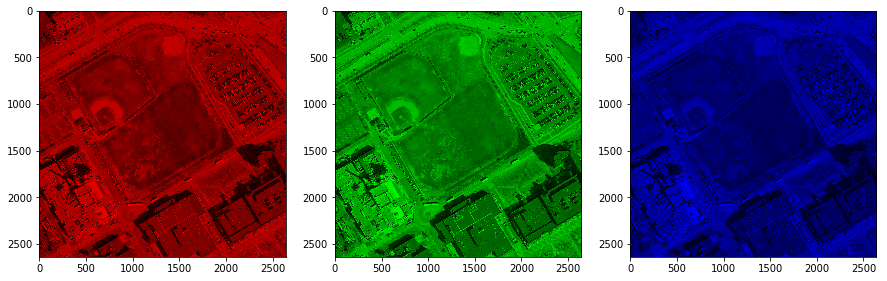

In [25]:
import imageio
pic = imageio.imread('JP2/Denver_image_1002.jpg')
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    # display each channel
    ax.imshow(split_img)


### Image Negative 

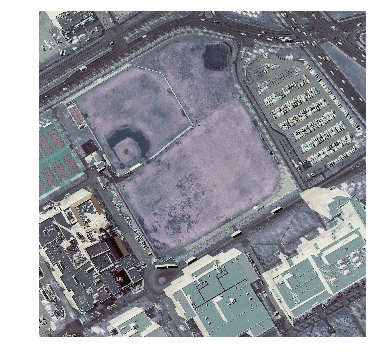

In [26]:
negative = 255 - pic # neg = (L-1) - img
plt.figure(figsize = (6,6))
plt.imshow(negative);
plt.axis('off');


### Log Transformation

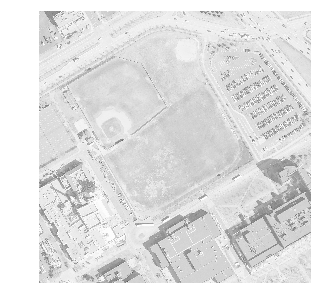

In [29]:

%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray(pic)
'''
log transform
-> s = c*log(1+r)
So, we calculate constant c to estimate s
-> c = (L-1)/log(1+|I_max|)
'''
max_ = np.max(gray)
def log_transform():
    return (255/np.log(1+max_)) * np.log(1+gray)
plt.figure(figsize = (5,5))
plt.imshow(log_transform(), cmap = plt.get_cmap(name = 'gray'))
plt.axis('off');

### Gamma Correction

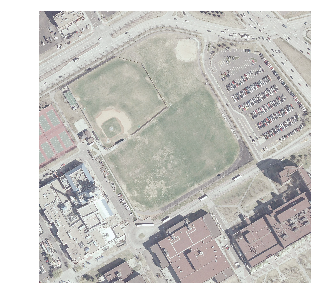

In [30]:
gamma = 2.2 # Gamma < 1 ~ Dark  ;  Gamma > 1 ~ Bright
gamma_correction = ((pic/255) ** (1/gamma)) 
plt.figure(figsize = (5,5))
plt.imshow(gamma_correction)
plt.axis('off');

### Convolution

CPU times: user 4min 31s, sys: 3.81 s, total: 4min 35s
Wall time: 4min 35s


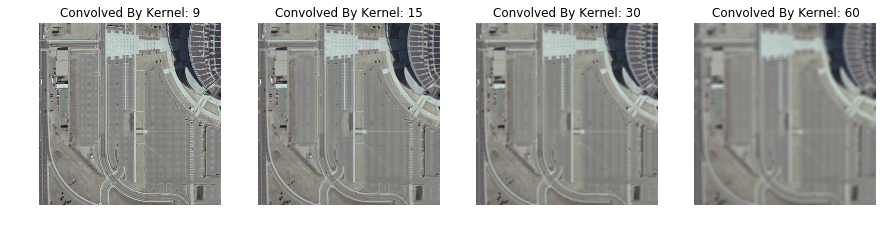

In [31]:
%%time
from scipy.signal import convolve2d
def Convolution(image, kernel):
    conv_bucket = []
    for d in range(image.ndim):
        conv_channel = convolve2d(image[:,:,d], kernel, 
                               mode="same", boundary="symm")
        conv_bucket.append(conv_channel)
    return np.stack(conv_bucket, axis=2).astype("uint8")
kernel_sizes = [9,15,30,60]
fig, axs = plt.subplots(nrows = 1, ncols = len(kernel_sizes), figsize=(15,15));
pic = imageio.imread('JP2/Denver_image_1006.jpg')
for k, ax in zip(kernel_sizes, axs):
    kernel = np.ones((k,k))
    kernel /= np.sum(kernel)
    ax.imshow(Convolution(pic, kernel));
    ax.set_title("Convolved By Kernel: {}".format(k));
    ax.set_axis_off();

### Outline Kernel

/home/thebbennett/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


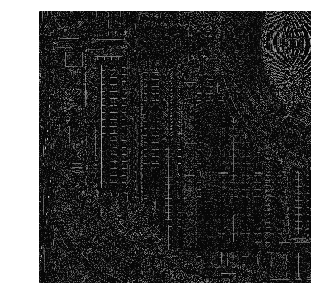

In [34]:
from skimage import color
from skimage import exposure

# Convert the image to grayscale 
img = color.rgb2gray(pic)
# outline kernel - used for edge detection
kernel = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])
# we use 'valid' which means we do not add zero padding to our image
edges = convolve2d(img, kernel, mode = 'valid')
# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)),
                                              clip_limit = 0.03)
# plot the edges_clipped
plt.figure(figsize = (5,5))
plt.imshow(edges_equalized, cmap='gray')    
plt.axis('off');

### Gaussian Window

/home/thebbennett/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


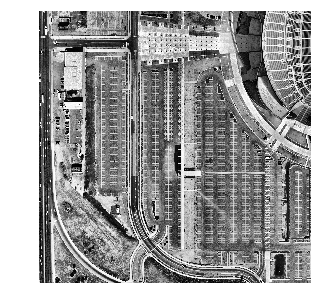

In [35]:

from skimage import color
from skimage import exposure
from scipy.signal import convolve2d
import numpy as np
import imageio
import matplotlib.pyplot as plt 
# import image
pic = imageio.imread('JP2/Denver_image_1006.jpg')
# Convert the image to grayscale 
img = color.rgb2gray(pic)
# gaussian kernel - used for blurring
kernel = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])
kernel = kernel / np.sum(kernel)
# we use 'valid' which means we do not add zero padding to our image
edges = convolve2d(img, kernel, mode = 'valid')
# Adjust the contrast of the filtered image by applying Histogram Equalization
edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)),
                                              clip_limit = 0.03)
# plot the edges_clipped
plt.figure(figsize = (5,5))
plt.imshow(edges_equalized, cmap='gray')    
plt.axis('off')
plt.show()

### Sobel Kernel

CPU times: user 1.87 s, sys: 331 ms, total: 2.2 s
Wall time: 2.22 s


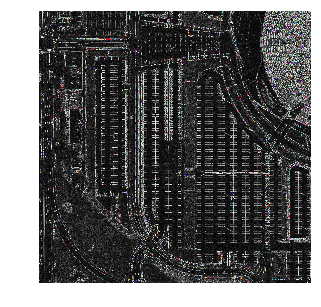

In [36]:
%%time
from skimage import color
from skimage import exposure
from scipy.signal import convolve2d
import numpy as np
import imageio
import matplotlib.pyplot as plt 
# import image
pic = imageio.imread('JP2/Denver_image_1006.jpg')
# right sobel
sobel_x = np.c_[
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]
# top sobel
sobel_y = np.c_[
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
]
ims = []
for i in range(3):
    sx = convolve2d(pic[:,:,i], sobel_x, mode="same", boundary="symm")
    sy = convolve2d(pic[:,:,i], sobel_y, mode="same", boundary="symm")
    ims.append(np.sqrt(sx*sx + sy*sy))
img_conv = np.stack(ims, axis=2).astype("uint8")
plt.figure(figsize = (6,5))
plt.axis('off')
plt.imshow(img_conv);

### Gaussian Filter

CPU times: user 2.46 s, sys: 416 ms, total: 2.87 s
Wall time: 2.9 s


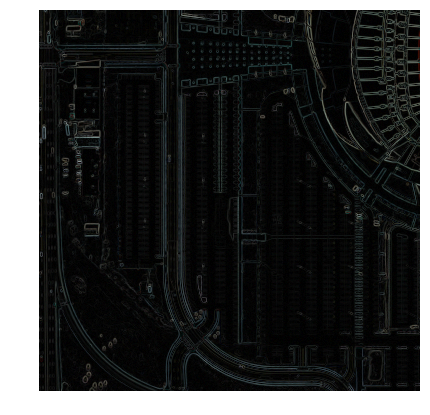

In [37]:
%%time
from scipy.signal import convolve2d
from scipy.ndimage import (median_filter, gaussian_filter)
import numpy as np
import imageio
import matplotlib.pyplot as plt 
def gaussain_filter_(img):
    """
    Applies a median filer to all channels
    """
    ims = []
    for d in range(3):
        img_conv_d = gaussian_filter(img[:,:,d], sigma = 4)
        ims.append(img_conv_d)
    return np.stack(ims, axis=2).astype("uint8")
filtered_img = gaussain_filter_(pic)
# right sobel
sobel_x = np.c_[
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]
# top sobel
sobel_y = np.c_[
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
]
ims = []
for d in range(3):
    sx = convolve2d(filtered_img[:,:,d], sobel_x, mode="same", boundary="symm")
    sy = convolve2d(filtered_img[:,:,d], sobel_y, mode="same", boundary="symm")
    ims.append(np.sqrt(sx*sx + sy*sy))
img_conv = np.stack(ims, axis=2).astype("uint8")
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(img_conv);

### Median Filter

In [ ]:
%%time
from scipy.signal import convolve2d
from scipy.ndimage import (median_filter, gaussian_filter)
import numpy as np
import imageio
import matplotlib.pyplot as plt 
def median_filter_(img, mask):
    """
    Applies a median filer to all channels
    """
    ims = []
    for d in range(3):
        img_conv_d = median_filter(img[:,:,d], size=(mask,mask))
        ims.append(img_conv_d)
    return np.stack(ims, axis=2).astype("uint8")
filtered_img = median_filter_(pic, 80)
# right sobel
sobel_x = np.c_[
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
]
# top sobel
sobel_y = np.c_[
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
]
ims = []
for d in range(3):
    sx = convolve2d(filtered_img[:,:,d], sobel_x, mode="same", boundary="symm")
    sy = convolve2d(filtered_img[:,:,d], sobel_y, mode="same", boundary="symm")
    ims.append(np.sqrt(sx*sx + sy*sy))
img_conv = np.stack(ims, axis=2).astype("uint8")
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(img_conv);